In [1]:
# docker run -p 8888:8888 -v `pwd`:/home/jovyan/work -it jupyter/datascience-notebook

import os
_ = os.system('pip install matplotx')

"""
# docker run -e GRANT_SUDO=yes --user root -p 8888:8888 -v `pwd`:/home/jovyan/work -it jupyter/datascience-notebook

_ = os.system('sudo apt-get install -y locales')
_ = os.system('sudo apt-get update')
_ = os.system('yes | sudo apt-get install language-pack-ru-base')
_ = os.system('sudo dpkg-reconfigure locales')
os.system('locale -a')
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
"""

"\n# docker run -e GRANT_SUDO=yes --user root -p 8888:8888 -v `pwd`:/home/jovyan/work -it jupyter/datascience-notebook\n\n_ = os.system('sudo apt-get install -y locales')\n_ = os.system('sudo apt-get update')\n_ = os.system('yes | sudo apt-get install language-pack-ru-base')\n_ = os.system('sudo dpkg-reconfigure locales')\nos.system('locale -a')\nlocale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')\n"

In [2]:
import glob
from bs4 import BeautifulSoup
import datetime
import locale
import matplotx
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [3]:
FPATH = 'www.popadancev.net_1'
os.chdir(FPATH)

In [4]:
# globals
post_dates = {}
post_authors = {}
comments = []  # author date time postname

In [5]:
s1 = '16.10.2016 at 14:36'
s2 = '3 января, 2017'

months = {
    'января': 'January',
    'февраля': 'February',
    'марта': 'March',
    'апреля': 'April',
    'мая': 'May',
    'июня': 'June',
    'июля': 'July',
    'августа': 'August',
    'сентября': 'September',
    'октября': 'October',
    'ноября': 'November',
    'декабря': 'December',
}
def parse_dt(s):
    if ' at ' in s:
        return datetime.datetime.strptime(s, '%d.%m.%Y at %H:%M')
    else:
        for k in months:
            s = s.replace(k, months[k])
        return datetime.datetime.strptime(s, '%d %B, %Y')

assert parse_dt(s1) == datetime.datetime(2016, 10, 16, 14, 36)
assert parse_dt(s2) == datetime.datetime(2017, 1, 3, 0, 0)

def post_extract(filename):
    post_name = filename.split('/')[0]
    with open(filename) as f:
        lines = f.readlines()
    page_content = ''.join(lines)
    soup = BeautifulSoup(page_content, 'html.parser')
    footer = soup.find('div', attrs={'class': 'post-footer'})
    if footer:
        dt, author, *_ = footer.text.split('|')
        post_dt = parse_dt(dt.strip())
        post_author = author.split(':')[1].strip()
        post_dates[post_name] = post_dt
        post_authors[post_name] = post_author
    for div_author, div_meta in zip(soup.findAll('div', attrs={'class': 'comment-author'}), soup.findAll('div', attrs={'class': 'comment-meta'})):
        author = div_author.find('span', attrs={'class': 'authorname'}).text
        dt = parse_dt([x for x in div_meta.text.split('\n') if ' at ' in x][0].strip())
        comments.append({'post_name':post_name, 'dt':dt, 'author':author})

In [6]:
filenames = []
post_count = 0
for filename in glob.iglob('**/**html**', recursive=True):
    if '/feed/' in filename:
        continue
    if '/comment-page' in filename:
        continue
    if filename.startswith('tag/'):
        continue
    if filename.startswith('sample-page/'):
        continue
    if filename.startswith('wp-json/'):
        continue
    if filename.startswith('feed/'):
        continue
    if filename.startswith('comments/'):
        continue
    if filename.startswith('page/'):
        continue
    if filename.startswith('index.'):
        continue
    if filename.startswith('author/'):
        continue
    if filename.startswith('category/'):
        continue
    if filename.startswith('20') and filename[4] == '/':
        continue
    if filename.startswith('forum/'):
        continue
    filenames.append(filename)
    post_count += 1
    v = len(comments)
    #print(len(comments) - v, post_count, filename)
    post_extract(filename)

print('DONE')

DONE


In [7]:
assert len([x for x in comments if x['post_name'] == 'vosstanovlenie-metricheskoj-sistemy']) == 157
assert len([x for x in comments if x['post_name'] == 'kompyuternye-igry']) == 45
assert len([x for x in comments if x['post_name'] == 'rele-2']) == 19
assert len([x for x in comments if x['post_name'] == 'gatling']) == 769

In [8]:
def plot(*args, first_n = None):
    plt.figure()
    for ps in args:
        # ps.sort(reverse=True)
        if first_n:
            ps = ps[:first_n]
        x = range(len(ps))
        y = list(ps)
        plt.plot(x, y)
    plt.show()

In [18]:
all = Counter()
authors0 = Counter()
authors = defaultdict(Counter)
for c in comments:
    a = c['author']
    d = c['dt']
    authors0[a]+=1
    authors[a][d.year] += 1
    all[d] += 1

for i,c in authors0.most_common(20):
    print(i, c)


kraz 4469
vashu1 3873
dan14444 2786
Taras 2572
dimav 1904
Hludens 1406
инженер 766
4eshirkot 765
2:5080/205 681
Йож 678
DlMFlRE 629
Akray 604
vpotapov1 528
Тарас 463
Гутенберг 446
hludens 413
onosamo 382
Nw 371
Grue 365
SaxaHorse 356


In [20]:
#dir(comments[0]['dt'])

vashu1 [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] (172, 883, 308, 514, 453, 239, 389, 226, 451, 238)
kraz [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] (440, 1852, 977, 341, 356, 231, 133, 78, 58, 3)
Йож [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] (278, 105, 117, 116, 3, 10, 34, 13, 2)
dan14444 [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] (816, 173, 456, 355, 111, 322, 110, 341, 102)
Hludens [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] (390, 71, 55, 292, 196, 204, 58, 120, 20)
Taras [2016, 2017, 2018, 2019] (725, 1301, 425, 121)
dimav [2014, 2015, 2016, 2017] (607, 465, 508, 324)
2:5080/205 [2012, 2013, 2014, 2015, 2016, 2019] (84, 231, 246, 102, 17, 1)
vpotapov1 [2014, 2015, 2016, 2017, 2018, 2019, 2021] (75, 195, 197, 39, 18, 1, 3)
Akray [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] (85, 85, 124, 89, 143, 22, 13, 20, 23)
инженер [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] (17, 407, 226, 71, 35, 6, 3, 1)
4es

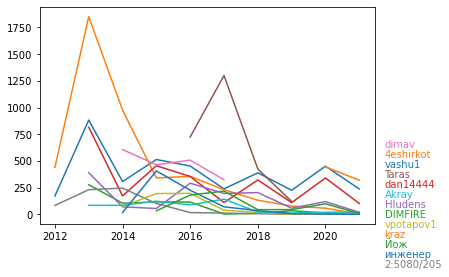

In [10]:
for a in authors:
    years, cnts = zip(*sorted(authors[a].most_common(), key=lambda v: v[0]))
    years = [int(y) for y in years]
    authors0[a] = sum(cnts)
    if sum(cnts) > 500:
        print(a, years, cnts)
        plt.plot(years, cnts, label=a)

matplotx.line_labels()
plt.show()

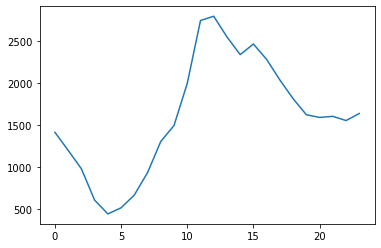

In [11]:

# hour
c = Counter([i['dt'].time().hour for i in comments])
plot([c[i] for i in range(24)])


In [12]:
# weekdays
Counter([i['dt'].weekday() for i in comments])

Counter({4: 6086, 3: 6252, 5: 3546, 2: 6219, 0: 6156, 6: 3860, 1: 6376})

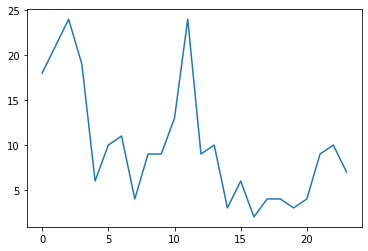

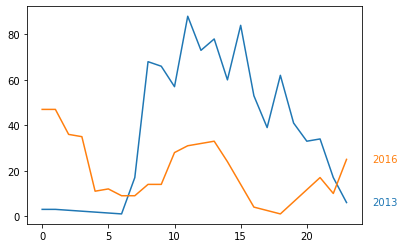

In [18]:

plot([c[i] for i in range(24)])

for y in [2013,2016]:
    c = Counter([i['dt'].time().hour for i in comments if i['dt'].year == y and i['author'] == 'vashu1'])
    
    years, cnts = zip(*sorted(c.most_common(), key=lambda v: v[0]))
    years = [int(y) for y in years]
    authors0[a] = sum(cnts)
    plt.plot(years, cnts, label=str(y))

matplotx.line_labels()
plt.show()

In [39]:
y = 2012
c = Counter([i['dt'].time().hour for i in comments if i['dt'].year == y and i['author'] == 'vashu1'])
c

Counter({13: 13,
         20: 6,
         7: 11,
         17: 15,
         21: 5,
         12: 19,
         8: 15,
         16: 7,
         18: 11,
         11: 10,
         14: 19,
         15: 16,
         9: 4,
         10: 8,
         19: 6,
         22: 6,
         23: 1})

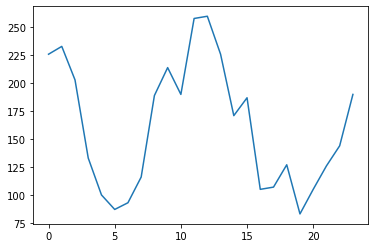

In [32]:
c = Counter([i['dt'].time().hour for i in comments if i['author'] == 'vashu1'])
plot([c[i] for i in range(24)])

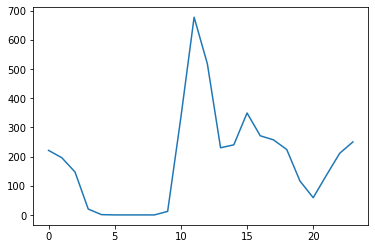

In [33]:
c = Counter([i['dt'].time().hour for i in comments if i['author'] == 'kraz'])
plot([c[i] for i in range(24)])

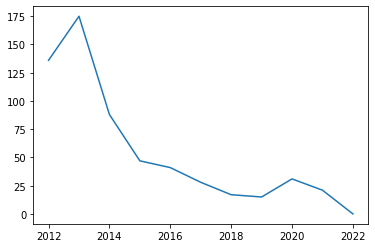

In [27]:
c = Counter([post_dates[p].year for p in post_dates])
#plot([c[i] for i in range(2012, 2023)])
ys = list(range(2012, 2023))
plt.plot(ys, [c[i] for i in ys])

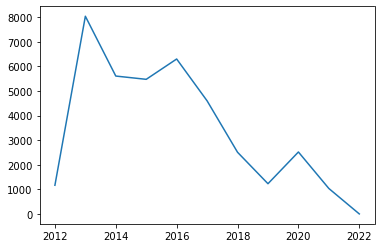

In [28]:
c = Counter([c['dt'].year for c in comments])
ys = list(range(2012, 2023))
plt.plot(ys, [c[i] for i in ys])

In [31]:
c

Counter({2012: 1166,
         2013: 8044,
         2016: 6304,
         2015: 5477,
         2017: 4601,
         2014: 5610,
         2020: 2520,
         2018: 2509,
         2021: 1035,
         2019: 1229})

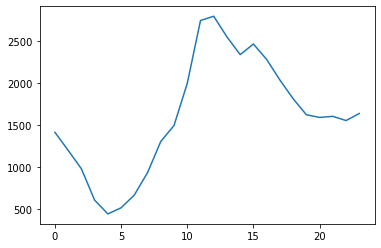

In [35]:
c = Counter([i['dt'].time().hour for i in comments])
plot([c[i] for i in range(24)])

In [22]:
posters = Counter()
for i in post_authors:
    posters[post_authors[i]] += 1

for i, c in posters.most_common():
    print(f'<a href="https://www.popadancev.net/author/{i}/">{i}</a>', c)

<a href="https://www.popadancev.net/author/kraz/">kraz</a> 433
<a href="https://www.popadancev.net/author/vashu1/">vashu1</a> 101
<a href="https://www.popadancev.net/author/4eshirkot/">4eshirkot</a> 27
<a href="https://www.popadancev.net/author/LysenkoAA2/">LysenkoAA2</a> 18
<a href="https://www.popadancev.net/author/Grue/">Grue</a> 5
<a href="https://www.popadancev.net/author/xolmc/">xolmc</a> 4
<a href="https://www.popadancev.net/author/PaRus/">PaRus</a> 2
<a href="https://www.popadancev.net/author/K_mert/">K_mert</a> 2
<a href="https://www.popadancev.net/author/Draft/">Draft</a> 2
<a href="https://www.popadancev.net/author/KonungGogn/">KonungGogn</a> 2
<a href="https://www.popadancev.net/author/WhiteWind/">WhiteWind</a> 1
<a href="https://www.popadancev.net/author/karakh/">karakh</a> 1
<a href="https://www.popadancev.net/author/o.volya/">o.volya</a> 1


In [23]:
len(post_authors)

599

In [24]:
len(comments)

38495